In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Define VGG19 model
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg19_base.trainable = False
model_vgg19 = models.Sequential([
    vgg19_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model_vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Train VGG19
history_vgg19 = model_vgg19.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1187s 632ms/step - accuracy: 0.7229 - loss: 0.8304 - val_accuracy: 0.9484 - val_loss: 0.1534
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1213s 627ms/step - accuracy: 0.9227 - loss: 0.2509 - val_accuracy: 0.9603 - val_loss: 0.1276
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1187s 633ms/step - accuracy: 0.9349 - loss: 0.2088 - val_accuracy: 0.9626 - val_loss: 0.1158
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1229s 637ms/step - accuracy: 0.9415 - loss: 0.1928 - val_accuracy: 0.9665 - val_loss: 0.1114
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1213s 633ms/step - accuracy: 0.9451 - loss: 0.1779 - val_accuracy: 0.9640 - val_loss: 0.1175
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1135s 606ms/step - accuracy: 0.9478 - loss: 0.1715 - val_accuracy: 0.9626 - val_loss: 0.1115
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1189s 634ms/step - accuracy: 0.9522 - loss: 0.1596 - val_accuracy: 0.9687 - val_loss: 0.1008
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1140s 608ms/s

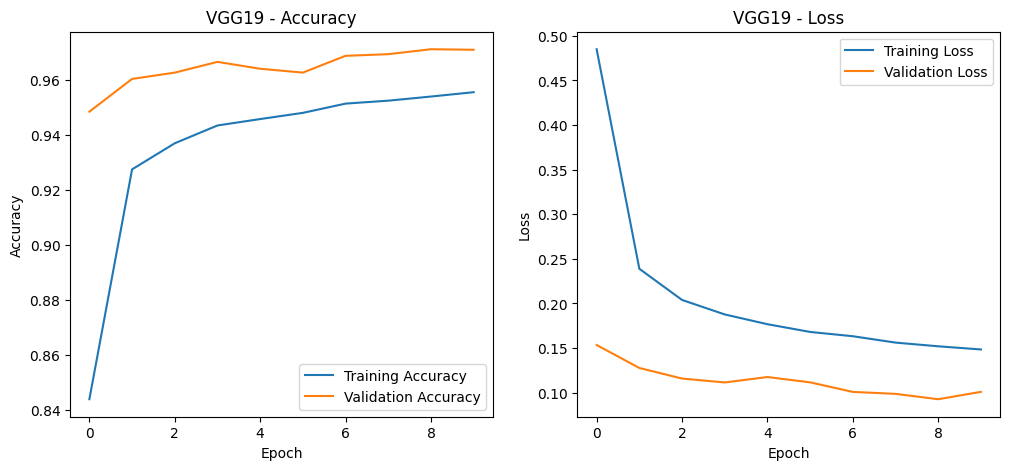

In [9]:
# Plot accuracy and loss
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history_vgg19, "VGG19")

In [10]:
# Evaluate on test data
test_loss, test_accuracy = model_vgg19.evaluate(x_test, y_test)
print(f"VGG19 Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 176s 563ms/step - accuracy: 0.9667 - loss: 0.1119
VGG19 Test Accuracy: 97.09%


313/313 ━━━━━━━━━━━━━━━━━━━━ 171s 545ms/step
Classification Report for VGG19:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.93      0.98      0.96       982
           5       0.97      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.99      0.92      0.95      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



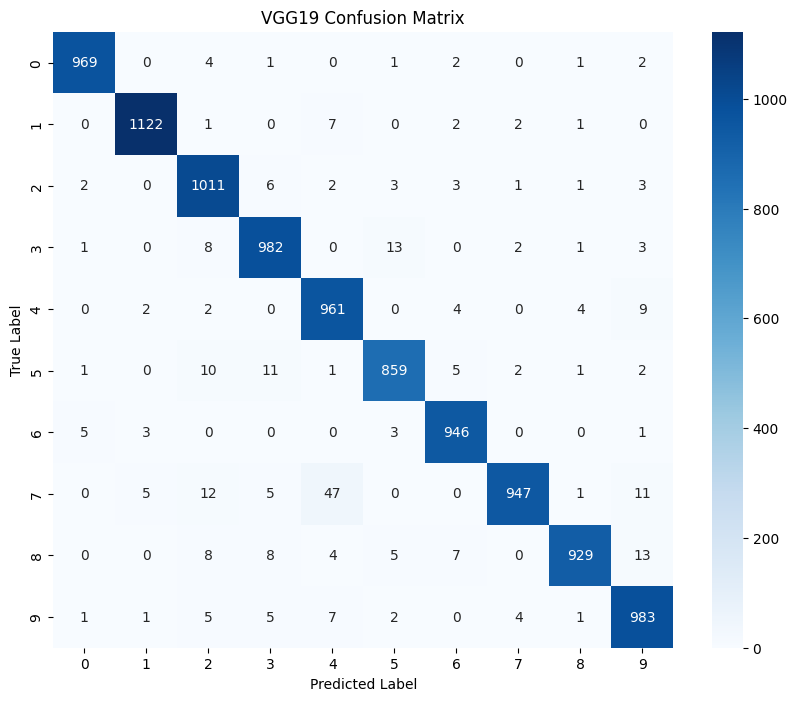

In [12]:
#Predictions and classification report
y_pred_vgg19 = model_vgg19.predict(x_test)
y_pred_classes = np.argmax(y_pred_vgg19, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report for VGG19:")
print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("VGG19 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

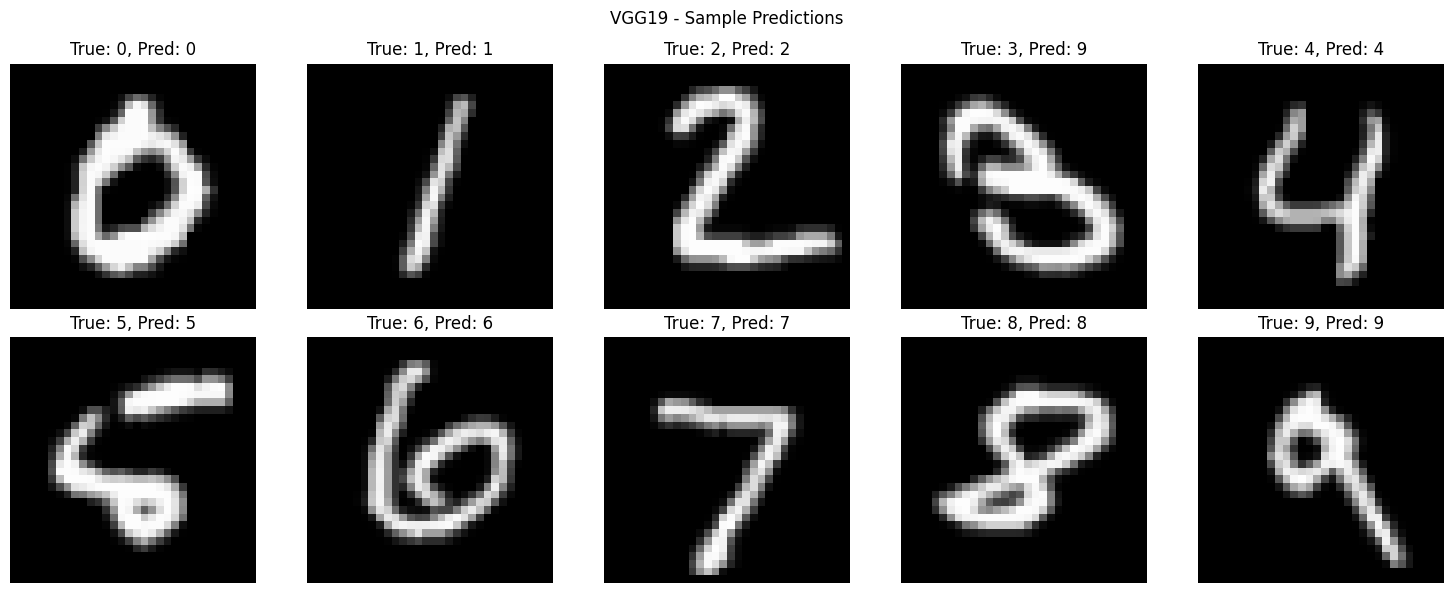

In [13]:
# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('VGG19 - Sample Predictions')
for i, ax in enumerate(axes.flat):
    idx = np.where(y_true == i)[0][0]
    ax.imshow(x_test[idx], cmap='gray')
    ax.set_title(f"True: {i}, Pred: {y_pred_classes[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()